In [1]:
import numpy as np 
from scipy import stats
import statsmodels.api as sm 
import pandas as pd
import matplotlib.pylab as plt 
%matplotlib inline

C:\Users\Sinner\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# CSCI 3022: Intro to Data Science - Spring 2018 Practicum 
***
- <span style="color:blue">Version 1.01 - clarified problem 1B (in blue text).</span>
- <span style="color:green">Version 1.02 - clarified problem 1D (in green text).</span>


This practicum is due on Moodle by **11:59pm on Wednesday May 2nd**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
2. You may **NOT** post to message boards or other online resources asking for help. 
3. You may **NOT** collaborate with classmates or anyone else.  

Violation of the above rules will result in an **F** in the course and a trip to Honor Council. 

***

**By writing your name below you agree to abide by the rules given above:**

**Name**: 

***


**NOTES**: 

- You may not use late days on the practicum nor can you drop your practicum grade. 
- If you have a question for Chris and Dan, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class we will make the post public (and anonymous). 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

### [35 points] Problem 1: Malaria Parasite Problems
***

Malaria parasites are very good at evading the immune system. Each parasite's genome has 60 different versions of a key immune evasion gene, so that when you get malaria, instead of simply getting sick and then getting better, the parasite switches among its 60 genes, sequentially, thereby changing its camouflage over and over and over. This is one of the reasons that malaria is still a huge problem today: you never develop a really strong immunity to the overall parasite population, due to its huge genetic diversity. You can read more about this [here](https://www.quantamagazine.org/networks-untangle-malarias-deadly-shuffle-20151015/) if you like. 

Here we are concerned with helping out lab scientists in desigining and evaluating their genetic sequencing experiments which target _var_ genes. The setup is as follows:

* Each parasite has a repertoire of 60 different "var" genes.
* A process called PCR is applied to a parasite genome. If PCR is successful, we get the sequence of one of the var genes, drawn at random from the repertoire of 60. However, PCR might not be successful at all, in which case we get nothing. Let the probability that a PCR attempt fails be equal to $f$. 
* In other words, with probability $f$, PCR yields nothing. With probability $1-f$, PCR produces a var gene sequence, and this sequence is chosen uniformly at random from among the total 60 var genes. 
* Importantly, PCR _does not deplete the DNA in the sample_, meaning that if one repeats the PCR process, the stochastic process described above takes place again, independently of the outcome of the previous PCR.
* In other words, a repeated PCR might fail, or it might succeed. And, if it succeeds, the same gene might be sequenced _or_ a different one of the 60 genes might be sequenced.
* To be clear: repeating PCR might sample a previously sampled gene, or it might sample another one of the 60. Then again, any individual PCR fails with probability $f$.

**Part A**: Suppose you have the budget to do $r$ PCR replicates (i.e. $r$ indepedent PCR trials). Let $k$ be the number of PCRs that are successful. Since $k$ is a random variable, what is the name of its distribution? What is the expected value of $k$, and how does it depend on $r$? What is the standard deviation of $k$?

This is a Binomial Distribution where:

$p = 1-f$

$q = f$

$E[Event] = (num replicates) * (probability of success)$

Expected Value: $E[k] = n * p$ or for our case $E[k] = r * (1-f)$

STD: $\sqrt{var}$ = $\sqrt{np(1-p)}$ or for our case $\sqrt{r*(1-f)*(1-(1-f))}$



**Part B**: Write a function called `draw_pcr_samples(r,f,var_repertoire)` that makes $r$ repeated attemps at PCR, each with independent probability of failure $f$. This code must return a list of the successfully sequenced var genes. For your convenience, please use the list `var_repertoire` below as the 60 possible var genes that are being sampled. <span style="color:blue">When written correctly, the output of this code will change each time, depending on the success or failure of each PCR, and which var gene is chosen. To examine the output of your function, please repeatedly call it under three different conditions, and produce the following histograms: </span>
* <span style="color:blue">distribution of the</span> number of unique var genes sampled for $r=48$ and $f=0$. Make this histogram **`blue`**.
* <span style="color:blue">distribution of the</span> number of unique var genes sampled for $r=60$ and $f=0.2$. Make this histogram **`green`**.
* <span style="color:blue">distribution of the</span> number of unique var genes sampled for $r=120$ and $f=0.6$. Make this histogram **`gold`**.

#r = number of PCRS
#f = failure rate
#var_repertoire = set
#### all of question 1 can be done by simulation, and making plots

might get 1 unique var gene, 

everytime we run the code we get a list of var genes, how many are unique?

histogram is the count of the var genes, normalized so that each bin represents the probability that if we run the code, we end up in THAT bin

#### for 2 better get numbers between 1 and 60

Freedman–Diaconis rule for bins?


In [665]:
var_repertoire = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q',
                  'r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H',
                 'I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
                 'π','ø','ß','∆','ç','Ω','µ','∞']
np.random.choice(var_repertoire)


'P'

In [666]:
arr = [1,1,2,3]
arr_set = set(arr)
print(arr_set)
print(len(arr_set))

{1, 2, 3}
3


In [671]:
def draw_pcr_samples(r,f,var_repertoire):
    option = [True,False]
    ssvg = []
    for ii in range(r):
        success = np.random.choice(option, p = [1-f, f])
        if(success==True):
            ssvg.append(np.random.choice(var_repertoire))
    #print(len(ssvg))
    return(ssvg)

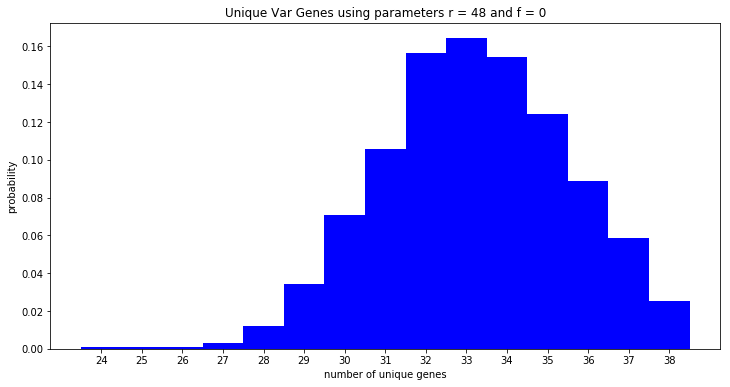

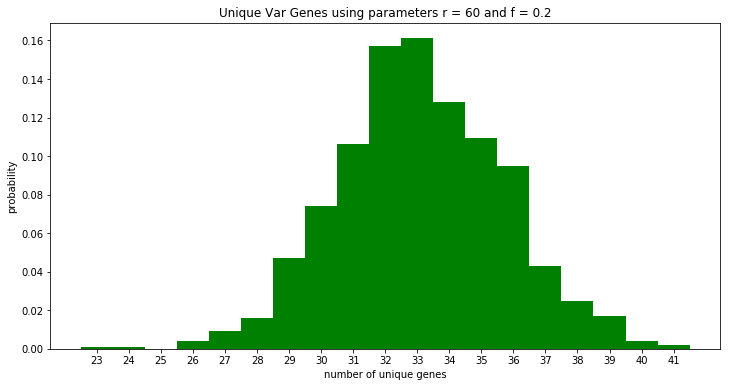

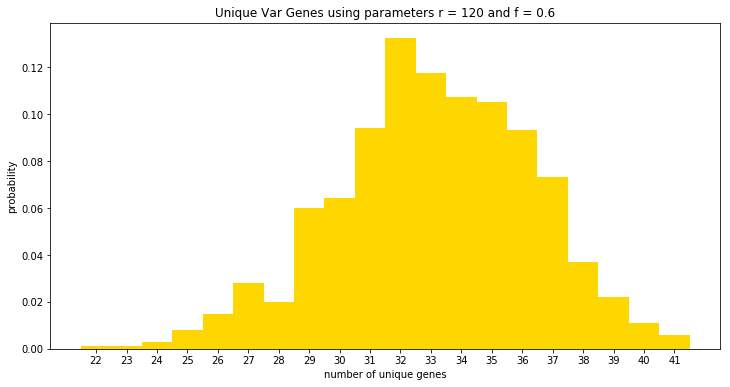

In [673]:
res = np.array([draw_pcr_samples(48,0,var_repertoire) for i in range(1000)])
res2 = np.array([draw_pcr_samples(60,.2,var_repertoire) for i in range(1000)])
res3 = np.array([draw_pcr_samples(120,.6,var_repertoire) for i in range(1000)])
def draw_hist(r, f, arr, color):
    count_unique = []
    for i in range(len(arr)):
        unique = len(set(arr[i]))
        count_unique.append(unique)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    minimum = min(count_unique)
    maximum = max(count_unique)
    plt.title("Unique Var Genes using parameters r = {} and f = {}".format(r, f))
    plt.ylabel("probability")
    plt.xlabel("number of unique genes")
    ax.hist(count_unique, bins = np.array([i+.5 for i in range(minimum-1, maximum, 1)]), normed=True, color = color)
    plt.xticks(np.array([i for i in range(minimum, maximum, 1)]))
    #print(count_unique)

draw_hist(48, 0, res, "blue")
draw_hist(60, 0.2, res2, "green")
draw_hist(120, 0.6, res3, "gold")
    
    

**Part C**: Use your calculations in Part A to write down the expected number of successful PCRs, $k$, for each of the three scenarios that you made histograms for in Part B. What do you notice? Write it in MarkDown. Then, examine the 3 histograms generated in Part B, and explain the relationship, if any, between the histograms and your expected $k$ calculations. If making calculations or annotating the histograms is helpful in your explanation, feel free to do so. 

In [674]:
res_mean = np.array([ len(res[i]) for i in range(1000)]).mean()
res_std = np.array([ len(res[i]) for i in range(1000)]).std()
res2_mean = np.array([ len(res2[i]) for i in range(1000)]).mean()
res2_std = np.array([ len(res2[i]) for i in range(1000)]).std()
res3_mean = np.array([ len(res3[i]) for i in range(1000)]).mean()
res3_std = np.array([ len(res3[i]) for i in range(1000)]).std()
print("Expected number of successful PCRs for r = 48 and failure rate= 0: {}".format(res_mean))
print("Standard Deviation for r = 48 and failure rate= 0: {}".format(res_std))
print("Expected number of successful PCRs for r = 60 and failure rate=.2: {}".format(res2_mean))
print("Standard Deviation for r = 60 and failure rate=.2: {}".format(res2_std))
print("Expected number of successful PCRs for r =120 and failure rate=.6: {}".format(res3_mean))
print("Standard Deviation for r =120 and failure rate=.6: {}".format(res3_std))

Expected number of successful PCRs for r = 48 and failure rate= 0: 48.0
Standard Deviation for r = 48 and failure rate= 0: 0.0
Expected number of successful PCRs for r = 60 and failure rate=.2: 48.031
Standard Deviation for r = 60 and failure rate=.2: 3.1128827475508936
Expected number of successful PCRs for r =120 and failure rate=.6: 47.916
Standard Deviation for r =120 and failure rate=.6: 5.360125371668092


**for r = 48 and failure rate= 0:**

expected number of successful PCRs: $E[k] = 48 * (1 - 0) = 48$

standard deviation = $\sqrt{40*(1-0) * (1-(1-0))} = 0$ 

**for r = 60 and failure rate=.2**

expected number of successful PCRs: $E[k] = 60 * (1 - .2) = 48$

standard deviation = $\sqrt{60*(1-.2)*(1-(1-.2))} = 3.09839$ 

** for r =120 and failure rate=.6**

expected number of successful PCRs: $E[k] = 120 * (1 - .2) = 48$

standard deviation = $\sqrt{120*(1-.6)*(1-(1-.6))} = 5.36656$

Our expected k calculations is 48. However, each time we succeed, we have less of a chance of selecting a new unique value. This is why our expected number of unique genes seems to be ~34 unique genes. As our failure rate increases, we introduce more variance, causing successed k to be more varied. However, the number of r PCR attempts mitigates the variance, so as r increases our variance decreases. The failure rate our chance of selecting exactly 34 unique genes, but our expected number of unique genes remains the same over trials. Selecting unique genes is a problem of selection with replacement which follows a binomial distribution where p = 60/(60-unique so far). 


**Part D**: Lab scientists use what's called a _96-well plate_ to do experiments. A [96-well-plate](https://www.amazon.com/SEOH-Microplates-Well-Non-Sterile-Microchemistry/dp/B0088AR7Y6) is an 8-by-12 grid of little wells in which indepedent experiments can be conducted. Professor Amy Ferguson is wondering whether to dedicate a whole plate ($r=96$ independent PCR replicates) or a half plate ($r=48$ independent PCR replicates) to her PCR experiment. Or, she wonders whether she should use a different $r$ altogether. Use your code to simulate and compute answers to the following, assuming $f=0.1$:
* In expectation, how many _unique_ genes are produced for $r=48$?
* In expectation, how many _unique_ genes are produced for $r=96$?
* If $r$ is large, then the chance that $55$ or more <span style="color:green">_unique_</span> genes are sampled will increase. Professor Ferguson needs the probability that $55$ or more <span style="color:green">_unique_</span> genes are sampled to be greater than 95%. What should $r$ be? Support your answer by creating a plot of <span style="color:green">$P(\text{at-least-55-unique-sampled} \mid r)$</span> vs $r$.

Expected number of successful PCRs for r = 48 and failure rate= 0.1: 43.284
Standard Deviation for r = 48 and failure rate= 0.1: 2.0754141755321993


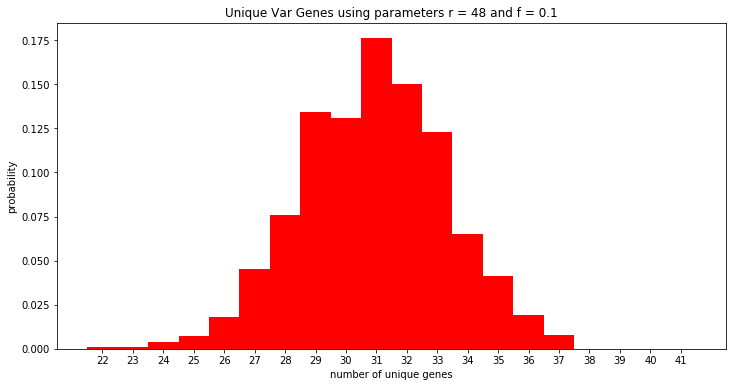

In [676]:
r=48
f=.1
num_samples = 1000
res = np.array([draw_pcr_samples(r,f,var_repertoire) for i in range(num_samples)])
res_mean = np.array([ len(res[i]) for i in range(num_samples)]).mean()
res_std = np.array([ len(res[i]) for i in range(num_samples)]).std()
draw_hist(r, f, res, "red")
print("Expected number of successful PCRs for r = 48 and failure rate= 0.1: {}".format(res_mean))
print("Standard Deviation for r = 48 and failure rate= 0.1: {}".format(res_std))

Expected number of successful PCRs for r = 96 and failure rate= 0.1: 86.337
Standard Deviation for r = 96 and failure rate= 0.1: 2.9426911152888606


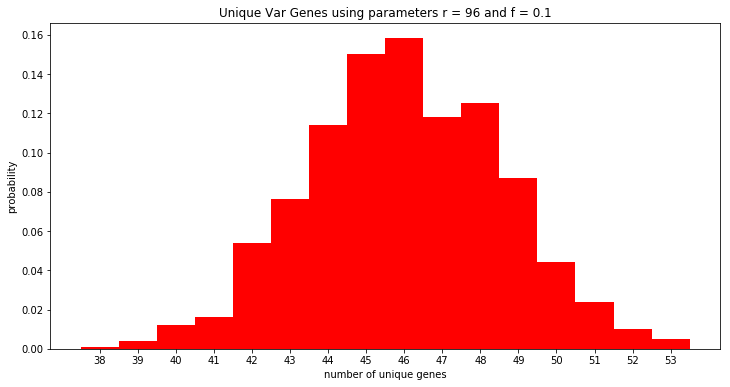

In [677]:
r=96
f=.1
num_samples = 1000
res = np.array([draw_pcr_samples(r,f,var_repertoire) for i in range(num_samples)])
res_mean = np.array([ len(res[i]) for i in range(num_samples)]).mean()
res_std = np.array([ len(res[i]) for i in range(num_samples)]).std()
draw_hist(r, f, res, "red")
print("Expected number of successful PCRs for r = 96 and failure rate= 0.1: {}".format(res_mean))
print("Standard Deviation for r = 96 and failure rate= 0.1: {}".format(res_std))

In [821]:
r=250
f=.1

r_value_arr = np.array([i for i in range(r)])
res_arr = np.array([0]*r)
prob_arr = np.array([0]*r)

num_samples = 250 #number of samples for each value of r
for j in range(num_samples):
    for i in range(100, r):
        if(np.array([len(set(draw_pcr_samples(i,f,var_repertoire)))]) > 55):
            res_arr[i] +=1
res_arr = res_arr/num_samples


    
print(res_arr)



[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.004 0.    0.004 0.004 0.008 0.    0.008 0.012 0.012 0.008 0.008
 0.012 0.008 0.02  0.016 0.028 0.004 0.028 0.036 0.036 0.04  0.048 0.04
 0.036 0.032 0.048 0.056 0.072 0.072 0.084 0.068 0.14  0.108 0.116 0.112
 0.128 0.148 0.164 0.168 0.172 0.22  0.232 0.22  0.264 0.256 0.268 0.264
 0.308 0.312 0.364 0.312 0.344 0.34  0.376 0.356 0.412 0.46  0.436 0.388
 0.48 

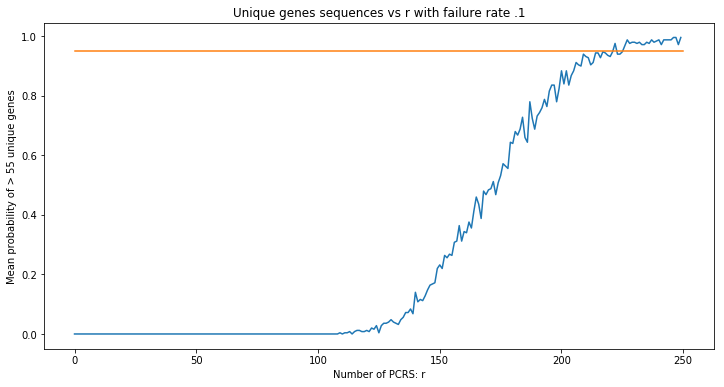

In [822]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(r_value_arr, res_arr)
plt.title("Unique genes sequences vs r with failure rate .1")
plt.ylabel("Mean probability of > 55 unique genes")
plt.xlabel("Number of PCRS: r")
ax.plot([0,250],[.95,.95])

** I wanted to get creative here and try to plot the probability vs r. This was of course very expensive to compute, and not very good as far as data science goes. However, I would say that we would need an r value of over 225. Since the plates come in 96 per plate. We should pay to use 2.5 plates for our sampling of genes to ensure that we get 55+ unique genes sampled. I used a lot of my time working on the regression model which was probably a bad idea in retrospect **

**Part E**: Bills, bills, bills. Professory Amy Ferguson has a decision to make about her lab budget. Here are some numbers:

* Each 96-well plate costs \$5 to buy. 
* The cheap PCR reagents cost $c=$\$0.05 per well and fail with probability $f=0.3$.
* The expensive PCR reagents cost $c=$\$0.10 per well and fail with probability $f=0.1$.
* The premium PCR reagents cost $c=$\$0.20 per well and fail with probability $f=0.05$.

Amy needs at least 50 unique sequences from a particular parasite genome for her experiment to be considered a success. She also knows that this whole PCR thing is a stochastic process, so while she might get 50 unique sequences in just $r=50$ attempts, that's going to be pretty rare. Still, increasing $r$ will increase the probability of success, i.e. of getting $\geq50$ unique sequences. 

Turns out, she needs to success with probability of at least 0.95. She could achieve this using the cheap reagents, the expensive reagents, or the premium reagents. Naturally, she'd need to buy more of the cheaper reagents, but... the tradeoff isn't clear. 

Help! Which reagents should she choose? State your answer clearly as a recommendation, and explain why you recommend that. Use figures and calculations as necessary to support your case.

You may assume:
* A 96-well plate costs \$5 even if fewer than 96 of the wells are actually used. For example, using 97 wells costs \$10, since it uses two plates.
* Reagents are billed on a per-well basis, not on a per-plate basis.
* The goal is to sample 50 or more unique sequences 95\% of the time or greater, but for as little money as possible.

### [35 points] Problem 2: Parental Leave
***

The file `leave.tsv` is in the data folder. It contains information on paid parental leave policies for US and Canadian institutions for tenure-track professors. 

Answer the following questions and provide both _pseudocode_ and code for each question. In other words, in a #comment, explain what your code is doing in each step, and give the reader a brief hint as to why that's a good or necessary step. (This is what we mean by pseudocode.)  Then, provide the code that answers the question. 

Note that `pandas` is your friend here. Also, note that the researchers who assembled `leave.tsv` may have coded missing data in a variety of ways, so you'll need to explore the file to learn what those are. 

**Part A**: Figure out what a `.tsv` file is and how to load it in using `pandas`. Call your dataframe `dfLeave`. **Note** that, as in many real-life data science tasks, there is no code to import this file type in any of our in-class notebooks or homeworks; This step will require a web search.

In [107]:
df = pd.read_csv("data/leave.tsv", delimiter = "\t")
df.head(10)

,university_name,short_name,is_private,rank,rank_ind,census_region,missing,paid_leave_len_woman,paid_leave_len_woman_units,paid_leave_weeks_woman,relief_woman,paid_leave_len_man,paid_leave_len_man_units,paid_leave_weeks_man,relief_man,link,notes,date
0,Arizona State University,Arizona State,0,108.72,101,West,0,6.0,week,6.0,Not specified,6.0,week,6.0,Not specified,https://provost.asu.edu/academic-personnel/par...,.,2/22/18
1,Auburn University,Auburn,0,126.69,122,South,0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,https://cws.auburn.edu/shared/content/files/85/,FMLA,2/22/18
2,Boston University,Boston,1,51.73,44,Northeast,0,1.0,term,14.0,Other,1.0,term,14.0,Other,https://www.bu.edu/handbook/leaves-absences/fa...,"Full semester for either parent, relief is FUL...",2/22/18
3,Brandeis University,Brandeis,1,84.55,78,Northeast,0,12.0,week,12.0,Not specified,12.0,week,12.0,Not specified,https://www.brandeis.edu/humanresources/docume...,.,2/22/18
4,Brigham Young University,Brigham Young,1,166.53,180,West,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not publicly accessible,Staff leave is 6wk,2/22/18
5,Brown University,Brown,1,21.92,18,Northeast,0,1.0,term,16.0,Just teaching,1.0,term,16.0,Just teaching,https://www.brown.edu/about/administration/dea...,One semester but only relief from teaching. Ot...,2/22/18
6,California Institute of Technology,CalTech,1,5.24,3,West,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not publicly accessible: https://provost.calte...,.,2/22/18
7,Carleton University,Carleton,0,101.73,93,Canada,0,12.0,week,12.0,Not specified,12.0,week,12.0,Not specified,https://carleton.ca/hr/wp-content/uploads/CUAS...,12 weeks paid + 5 weeks with the Employer payi...,2/22/18
8,Carnegie Mellon University,Carnegie Mellon,1,9.28,6,Northeast,0,1.0,term,16.0,Not specified,1.0,term,16.0,Not specified,https://www.cmu.edu/policies/faculty/faculty-p...,Statement seems to imply relief from all dutie...,2/22/18
9,Case Western Reserve University,Case Western Reserve,1,70.82,58,Midwest,0,16.0,week,16.0,All duties,16.0,week,16.0,All duties,http://case.edu/facultysenate/media/caseedu/fa...,Up to 16 weeks,2/22/18


**Part B**: Answer the following summary questions:
* How many institutions are in the dataset? 
* How many actually have parental leave data in the `paid_leave_len_woman` column? 
* How many private institutions are there? 
* How many institutions have a note associated with them?

In [130]:
print("How many institutions are in the dataset? Unique Institutions: {}".format(len(set(df['university_name']))))
print("How many actually have parental leave data in the paid_leave_len_woman column? Not Null: {}".format(sum(df['paid_leave_len_woman'].notnull())))
print("How many private institutions are there? Private Institutions: {}".format(sum(df['is_private'] == 1)))
print("How many institutions have a note associated with them? Institutions w/ notes: {}".format(sum(df['notes'] != '.')))


How many institutions are in the dataset? Unique Institutions: 205
How many actually have parental leave data in the paid_leave_len_woman column? Not Null: 197
How many private institutions are there? Private Institutions: 53
How many institutions have a note associated with them? Institutions w/ notes: 174


Q1 Explanation: I have collected all the rows in column 'university_name' and used the set() function to get only the unique items. I then used the len() function to count the number of unique items. We then find that there are 205 unique institutions included in this dataset.

Q2 Explanation: I have grabbed all rows in column 'paid_leave_len_woman'. From this, I used the not_null call on the dataframe to get all items which have values which would not considered empty or nothing. For this answer, the rows I have grabbed have been converted by the not_null() call to 0 or 1. This means that I can find the count by summing their total. Thus, we find that there are 197 non-null values in this column ('paid_leave_len_woman'). 

Q3 Explanation: This column('is_private') is already filled with 0 or 1 as a true false value. This means that like with question 3, I can just sum them to find the number of private institutions (53). 

Q4 Explanation: Here, the missing values in column 'notes' have been filled with '.' so I was able to check if their values was equal to '.'. This returns a set of True/False values which I can sum to a total for the count. 


**Part C**: Is there statistical evidence at the $\alpha=0.05$ level that public and private institutions have different _average paid parental leave durations_? Answer the question separately for men and for women. Note that the researchers have conveniently included a column that converts durations into weeks so that policies can be compared across institutions, even if some are on semesters or quarters, etc. 

Explanation: I will construct a Null Hypothesis $H_0$ and an alternative hypothesis $H_1$ to compare the difference in their means.

$H_0: \mu_1 = \mu2 $  The average paid parental leave durations are the same for both institutions.

$H_1: \mu_1 \neq \mu2 $ The average paid parental leave durations are **not** the same for both institutions.

This is the formula I will use to construct my test statistic:

$Z = \frac{\mu_1 - \mu2}{\sqrt{\frac{s_1^2}{m} + \frac{s_2^2}{m}}}$

In [179]:

#separate the public and private data into two datasets
dfPriv = df.loc[df['is_private'] == 1]
dfPub = df.loc[df['is_private'] == 0]


mu_men_pub = dfPub['paid_leave_weeks_man'].sum() / dfPub['paid_leave_len_man'].notnull().sum()
mu_men_priv = dfPriv['paid_leave_weeks_man'].sum() / dfPriv['paid_leave_len_man'].notnull().sum()
std_men_pub = dfPub['paid_leave_weeks_man'].std()
std_men_priv = dfPriv['paid_leave_weeks_man'].std()
sample_size_men_pub = dfPub['paid_leave_len_man'].notnull().sum()
sample_size_men_priv = dfPriv['paid_leave_len_man'].notnull().sum()

print("mean for men public: ", mu_men_pub, "\nmean for men private: ", mu_men_priv)
#calculate test statistic
Z = (mu_men_pub - mu_men_priv) / np.sqrt(((std_men_pub**2) / sample_size_men_pub ) + ((std_men_priv**2) / sample_size_men_priv ))
print("test statistic {} < critical value {} for alpha = .05, reject the null hypothesis".format(Z, stats.norm.ppf(.05)))


mu_women_pub = dfPub['paid_leave_weeks_woman'].sum() / dfPub['paid_leave_len_woman'].notnull().sum()
mu_women_priv = dfPriv['paid_leave_weeks_woman'].sum() / dfPriv['paid_leave_len_woman'].notnull().sum()
std_women_pub = dfPub['paid_leave_weeks_woman'].std()
std_women_priv = dfPriv['paid_leave_weeks_woman'].std()
sample_size_women_pub = dfPub['paid_leave_len_woman'].notnull().sum()
sample_size_women_priv = dfPriv['paid_leave_len_woman'].notnull().sum()

print("mean for women public: ",mu_women_pub, "\nmean for women private: ", mu_women_priv)
#calculate test statistic
Z = (mu_women_pub - mu_women_priv) / np.sqrt(((std_women_pub**2) / sample_size_women_pub ) + ((std_women_priv**2) / sample_size_women_priv ))
print("test statistic {} < critical value {} for alpha = .05, reject the null hypothesis".format(Z, stats.norm.ppf(.05)))


mean for men public:  6.154362416107382 
mean for men private:  8.916666666666666
test statistic -2.3445633830463137 < critical value -1.6448536269514729 for alpha = .05, reject the null hypothesis
mean for women public:  8.201342281879194 
mean for women private:  10.520833333333334
test statistic -1.8706946991254723 < critical value -1.6448536269514729 for alpha = .05, reject the null hypothesis


#### The hypothesis tests for both men and women that private and public leave time in weeks in the same show that we can reject the null hypothesis. There is statistical evidence at the alpha = .05 level that the average paid parental leave durations are not the same.  

**Part D**: Some institutions provide zero weeks of paid parental leave. For each `census_region` in the dataset, create a 95% confidence interval for the _proportion of universities that offer zero paid parental leave to their professors_. Based on your observations, is there evidence that policies vary significantly by census region? 

Please note that the number of data points varies from one census region to another, and therefore, different methods may be required to compute confidence intervals for the proportions in different census regions. _Clearly_ state which methods were used to create each confidence interval.

For clarity, please plot your confidence intervals as vertical bars in a single plot. From left to right, please plot in the order `Canada`, `Northeast`, `Midwest`,`South`, `West`.

### [30 points] Problem 3: Multiple Linear Otter-gression 
***

After years of study and professional development, you have finally landed your dream job as lead otter scientist.  It is a [dream job](https://www.youtube.com/watch?v=IXFqLIBHm-E). As your first project, you wish to use multiple linear regression to understand and predict what makes otters Instagrammable, as measured during many observations of otters, conducted by students.  Luckily, your predecessor has collected lots of data that might prove relevant.  You'll find this data in the file `otters.csv`. 

**Response**: 

- $\texttt{instagrammability}$: The instagrammability of a particular otter, measured by a complicated formula involving likes, comments, DMs, reposts, and new followers.

**Features**: 

- $\texttt{urchin color}$: the depth of color of the urchins nearby, measured in Wongs. 
- $\texttt{fur fluff}$: the fluff factor of the otter's fur, measured in Ketelsens.
- $\texttt{adorbz}$: unknown variable. The students keep writing it down. Units unknown.
- $\texttt{temp}$: the outside temperature, measured in degrees Fahrenheit 
- $\texttt{majesty}$: the majesty of this particular otter in this particular photo, measured as a fraction of maximum majesty (between 0 and 1). 
- $\texttt{observer GPA}$: the GPA of the student who recorded the data.
- $\texttt{paw size}$: measured as some kind of deviation away from the median paw size. Units unknown.
- $\texttt{paw grip}$: grip strength of paw (estimated) measured in Grochows. 
- $\texttt{ice cream sold}$: the number of units of ice cream sold at Etai's
- $\texttt{shark attacks}$: the number of shark attacks at the Boulder Res on the day of observation


**Part A**: Read the data from **otters.csv** into a Pandas DataFrame and clean the data.  Note that since we will be doing a multiple linear regression we will need all of the features, so you should drop any row in the DataFrame that is missing data.  

In [530]:
dfOtters = pd.read_csv('data/otters.csv')
dfOtters = dfOtters.dropna()
dfOtters['temp'] = dfOtters["temp"].apply(lambda s: str(s).strip("℉"))
dfOtters['fur fluff'] = dfOtters["fur fluff"].apply(lambda s: str(s).strip("ɭ"))
dfOtters['urchin color'] = dfOtters["urchin color"].apply(lambda s: str(s).strip("ƭ"))
dfOtters = dfOtters.reset_index(drop=True)
print(dfOtters.count())
#print(dfOtters)
dfOtters.head()

instagrammability    85
urchin color         85
fur fluff            85
adorbz               85
temp                 85
majesty              85
observer GPA         85
paw size             85
paw grip             85
ice cream sold       85
shark attacks        85
dtype: int64


,instagrammability,urchin color,fur fluff,adorbz,temp,majesty,observer GPA,paw size,paw grip,ice cream sold,shark attacks
0,138.70,89.1,6.8,263.0,62,1.00,2.04,0.0,25.0,196.0,3.0
1,121.87,93.4,8.0,264.0,63,1.00,2.69,-4.0,21.0,189.0,1.0
2,117.31,85.9,7.6,243.0,55,0.84,3.17,-2.0,11.0,219.0,0.0
3,80.69,89.1,6.0,260.0,52,0.73,2.13,-13.0,107.0,101.0,0.0
4,127.52,94.6,8.1,251.0,57,0.89,2.40,-6.0,43.0,186.0,0.0


**Part B**: Perform the appropriate statistical test at the $\alpha = 0.05$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

$F = \frac{\frac{SST - SSE}{dfSST - dfSSE}} {\frac{SST - SSE}{dfSST - dfSSE}} = \frac{\frac{SST - SSE}{p}} {\frac{SST - SSE}{n-p-1}}$

$SSE = \sum_{i=1}^n(y_i - (B_0 + B_1x_{1i} + B_2x_{2i} + ... + B_px_{pi}))^2$

$SST = \sum_{i=1}^n(y_i-\bar{y})^2$

Hypothesis Test:

$H_0: B_1 = B_2 = B_3 =... = B_{p-1}$

$H_1: B_j \neq 0$ for at least one value j

In [644]:
def compute_SSE(df, model_params, y_str, features): 
    #print(features_so_far)
    SSE = 0
    #print(model_params)
    df[col] = df[col].astype(float)
    for i in range(len(df[col])):
        yi = df[y_str][i]
        y_bari = model_params[0]
        for j in range(1, len(model_params)):
            #print(features_so_far[0][0])
            #print(df[features_so_far[j-1]])
            #print(j,i)
            
            y_bari += model_params[j]*df[features[j-1]][i]
        SSE += (yi - y_bari)**2
    #print("SSE for", col, ":", SSE)
    return(SSE)


def compute_SST(df, cols, y_str):
    SST = 0
    y_bar = df[y_str].mean()
    #print(y_bar)
    for i in range(len(df[cols])):
        #print(df[y_str][i], y_bar)
        SST += (df[y_str][i] - y_bar)**2
    return(SST)

feats = ["urchin color", "fur fluff", "adorbz", "temp", "majesty", "observer GPA", "paw size", "paw grip", "ice cream sold", "shark attacks"]


X = dfOtters[["urchin color", "fur fluff", "adorbz", "temp", "majesty", "observer GPA", "paw size", "paw grip", "ice cream sold", "shark attacks"]]
y = dfOtters["instagrammability"]
X = sm.add_constant(X)
model = sm.OLS(y,X.astype(float)).fit()
#print(model.summary())
#dfOtters.head()

#compute_SSE(df, poss_feat[i], model.params, resp_Str)
SSE = compute_SSE(dfOtters, model.params, "instagrammability", feats)
SST = compute_SST(dfOtters, feats, "instagrammability")
print("SST: {}, SSE: {}".format(SST, SSE))

n = len(dfOtters["instagrammability"])

dfSST = n-1
p=10 #number of features in the model, i think
dfSSE = n-(p+1)

F = ((SST-SSE) / p) / (SSE/(n-p-1))
print("Fstatistic: {} yes! this matches model.summary() this was hard to think about ".format(F))

stats.f.cdf(F, p, n-p-1)
print("My F statistic gives me a p value:{} > {} so I can reject the null. At least one of the features is important ".format(stats.f.cdf(F, p, n-p-1), .95))



full_model = model
full_model.params = model.params





SST: 137747.21007764703, SSE: 1758.5467865482624
Fstatistic: 572.2430111338487 yes! this matches model.summary() this was hard to think about 
My F statistic gives me a p value:0.9999999999999999 > 0.95 so I can reject the null. At least one of the features is important 


**Part C**: Write a function `forward_select(df, resp_str, maxk)` that takes in the DataFrame, the name of the column corresponding to the response, and the max number of desired features, and returns a list of feature names corresponding to the maxk most important features via forward selection.  At each stage in forward selection you should add the feature whose inclusion in the model would result in the lowest sum of squared errors $(SSE)$. Use your function to determine the best $k=5$ features to include in the model. Clearly indicate which feature was added in each stage. 

**Note**: The point of this exercise is to see if you can implement `foward_select` yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs forward selection. 

#keep features

**I PROGRAMMED THIS TWICE, OUCH! I really really hope this is right**

In [645]:
# NOTES FROM OFFICE HOURS:

#fit the model with no constants, the model will simply fit to y
#find the first feature using SLR
#find subsequent features by addding to the MLR model, and checking the result, until we get the desired number of features in the model

# try fitting each feature using SLR
# for loop iterating ovet the SLRs
# -fit SLR to feature i
# -be sure to add constant(X) = the intercept = beta0
# -compute SSE
# find from the SSEs which feature minimized SSE
# keep that one
# print out its name, why not?  

# next: fit all the 2 feature models(that include best SLR feature)
# for loop iterating over remaining features(features minue the one we chose)
# -fit MLR to feature i and best_feature from above
# -be sure to add_constant(X)
# -compute SSE for each
# keep that one.
# now we have 2 features

#fit all the 3 feature models...

#helper function
def compute_SSE(df, col, model_params, y_str, features_so_far): 
    features_so_far.append(col)
    #print(features_so_far)
    SSE = 0
    #print(model_params)
    df[col] = df[col].astype(float)
    for i in range(len(df[col])):
        yi = df[y_str][i]
        y_bari = model_params[0]
        for j in range(1, len(model_params)):
            #print(features_so_far[0][0])
            #print(df[features_so_far[j-1]])
            #print(j,i)
            
            y_bari += model_params[j]*df[features_so_far[j-1][0]][i]
        SSE += (yi - y_bari)**2
    #print("SSE for", col, ":", SSE)
    return(SSE)

def forward_select(df,resp_Str,maxk): 
    poss_feat = []
    k=0
    dfFeatures = []
    features_so_far = []
    #insert features into array
    for col, row in df.iteritems():
        if(col != resp_Str):
            poss_feat.append(col)
            
    feat_SSE = [0] * len(poss_feat)
    while(k < maxk):
        #fit one feature at a time
        for i in range(len(poss_feat)):
            if(dfFeatures == []):#first feature
                X = sm.add_constant(df[poss_feat[i]])
            else: #concat the dataframes to check for next feature
                X = sm.add_constant(pd.concat([df[poss_feat[i]], df[dfFeatures]], axis=1))
            model = sm.OLS(y,X.astype(float)).fit()
            #print(model.params)

            #calculate SSE
            feat_SSE[i] = compute_SSE(df, [poss_feat[i]], model.params, resp_Str, features_so_far)
            #print(feat_SSE)
        minimized_SSE = min(feat_SSE)
        minimized_index = feat_SSE.index(minimized_SSE)
        dfFeatures.append(poss_feat[minimized_index])
        features_so_far.append(poss_feat[minimized_index])
        print("adding feature {} with SSE of {}".format(poss_feat[minimized_index], minimized_SSE))
        del poss_feat[minimized_index]
        del feat_SSE[minimized_index]
        k+=1
    print("final selection of features:", dfFeatures)
    X = sm.add_constant(df[dfFeatures])
    model = sm.OLS(y,X.astype(float)).fit()
    return(model.params, model)
        
    
my_params, my_model = forward_select(dfOtters, "instagrammability", 5)
dfOtters.head()
#print(dfOtters["urchin color"])






adding feature urchin color with SSE of 137331.7330698677
adding feature temp with SSE of 148643.6464116486
adding feature paw grip with SSE of 1294098.4357982827
adding feature paw size with SSE of 3309858.1374644763
adding feature fur fluff with SSE of 4083549.938982187
final selection of features: ['urchin color', 'temp', 'paw grip', 'paw size', 'fur fluff']


,instagrammability,urchin color,fur fluff,adorbz,temp,majesty,observer GPA,paw size,paw grip,ice cream sold,shark attacks
0,138.70,89.1,6.8,263.0,62.0,1.00,2.04,0.0,25.0,196.0,3.0
1,121.87,93.4,8.0,264.0,63.0,1.00,2.69,-4.0,21.0,189.0,1.0
2,117.31,85.9,7.6,243.0,55.0,0.84,3.17,-2.0,11.0,219.0,0.0
3,80.69,89.1,6.0,260.0,52.0,0.73,2.13,-13.0,107.0,101.0,0.0
4,127.52,94.6,8.1,251.0,57.0,0.89,2.40,-6.0,43.0,186.0,0.0


In [647]:
print(my_params)

const           66.936176
urchin color     1.011323
temp            -0.985249
paw grip        -0.048437
paw size         5.061242
fur fluff        5.744329
dtype: float64


**Part D**: Write down the multiple linear regression model, including estimated parameters, obtained by your forward selection process. 

$x1 = urchin color$  
$x2 = temp$         
$x3 = paw grip$    
$x4 = paw size$              
$x5 = fur fluff$  

### My Model:
$$y = 66.936176 + 1.011323 x_1 -0.985249 x_2 -0.048437 x_3 +5.061242 x_4 + 5.744329 x_5$$

**Part E**: Perform the appropriate statistical test at the $\alpha = 0.05$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by forward selection in **Part D**. 

In [662]:
def compute_SSE(df, model_params, y_str, features): 
    #print(features_so_far)
    SSE = 0
    #print(model_params)
    df[col] = df[col].astype(float)
    for i in range(len(df[col])):
        yi = df[y_str][i]
        y_bari = model_params[0]
        for j in range(1, len(model_params)):
            #print(features_so_far[0][0])
            #print(df[features_so_far[j-1]])
            #print(j,i)
            
            y_bari += model_params[j]*df[features[j-1]][i]
        SSE += (yi - y_bari)**2
    #print("SSE for", col, ":", SSE)
    return(SSE)

def compute_SST(df, cols, y_str):
    SST = 0
    y_bar = df[y_str].mean()
    #print(y_bar)
    for i in range(len(df[cols])):
        #print(df[y_str][i], y_bar)
        SST += (df[y_str][i] - y_bar)**2
    return(SST)

#FULL_MODEL**----------------------------------------------------------------------------------------------**

feats = ["urchin color", "fur fluff", "adorbz", "temp", "majesty", "observer GPA", "paw size", "paw grip", "ice cream sold", "shark attacks"]


X = dfOtters[["urchin color", "fur fluff", "adorbz", "temp", "majesty", "observer GPA", "paw size", "paw grip", "ice cream sold", "shark attacks"]]
y = dfOtters["instagrammability"]
X = sm.add_constant(X)
model = sm.OLS(y,X.astype(float)).fit()
#print(model.summary())
#dfOtters.head()

#compute_SSE(df, poss_feat[i], model.params, resp_Str)
FULL_SSE = compute_SSE(dfOtters, model.params, "instagrammability", feats)
FULL_SST = compute_SST(dfOtters, feats, "instagrammability")
print("FULL MODEL SST: {}, SSE: {}".format(FULL_SST, FULL_SSE))

#**----------------------------------------------------------------------------------------------**

#MY MODEL

feats = ["urchin color", "fur fluff", "temp", "paw size", "paw grip"]


X = dfOtters[["urchin color", "fur fluff", "temp",  "paw size", "paw grip"]]
y = dfOtters["instagrammability"]
X = sm.add_constant(X)
model = sm.OLS(y,X.astype(float)).fit()
#print(model.summary())
#dfOtters.head()

#compute_SSE(df, poss_feat[i], model.params, resp_Str)
SSE = compute_SSE(dfOtters, model.params, "instagrammability", feats)
SST = compute_SST(dfOtters, feats, "instagrammability")
print("MY MODEL SST: {}, SSE: {}".format(SST, SSE))





#**----------------------------------------------------------------------------------------------**


n = len(dfOtters["instagrammability"])

# dfSST = n-1
p = 10 
k = 5
# dfSSE = n-(p+1)


F = ((SSE-FULL_SSE) / (p-k)) / (FULL_SSE/(n-p-1))
print(F)
stats.f.ppf(.95, p-k, n-p-1)

print("My test statistic F: {} > {} for alpha = .05, thus I can reject the full model".format(F, stats.f.ppf(.95, p-k, n-p-1)))



    

FULL MODEL SST: 137747.21007764703, SSE: 1758.5467865482624
MY MODEL SST: 137747.21007764703, SSE: 5703.670817395325
33.202321429924666
My test statistic F: 33.202321429924666 > 2.338277630605569 for alpha = .05, thus I can reject the full model


**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict an otter's instagrammability when the following features are observed: 

- $\texttt{urchin color}$: 93 Wongs
- $\texttt{fur fluff}$: 8.2 Ketelsens
- $\texttt{adorbz}$: 273
- $\texttt{temp}$: 46F 
- $\texttt{majesty}$: 0.79 
- $\texttt{observer GPA}$: 3.50 
- $\texttt{paw size}$: -10 
- $\texttt{paw grip}$: 55 Grochows
- $\texttt{ice cream sold}$: 130
- $\texttt{shark attacks}$: 3 

In [638]:
y = 66.936176 +( 1.011323 * 93) -(0.985249 * 46) -(0.048437 * 55) +(5.061242 * -10) + (5.744329 * 8.2 )
print("This otter has an instagrammability of : {} based on my model".format(y))



This otter has an instagrammability of : 109.4948038 based on my model
